In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

## Load data

In [2]:
from data.settings import DataConfig
from data.prep import DataPreprocessor

data_config = DataConfig(run_type='custom_test')
dp = DataPreprocessor(package='fault_detection')

data_loader = dp.get_custom_dataloader(data_config)

In [3]:
dataiter = iter(data_loader)
data, labels = next(dataiter)

In [4]:
data.shape, labels.shape

(torch.Size([50, 1, 500, 1]), torch.Size([50, 1]))

### Freq domain

In [5]:
from data.transform import DomainTransformer
from data.settings import get_domain_config

domain_config = get_domain_config('freq')

domain_transformer = DomainTransformer(domain_config)
freq_mag, freq_bins = domain_transformer.transform(data)

## Feature extraction

In [6]:
from extractor import get_feature_list

feat_list = get_feature_list(n=6, perf_v=1, rank_v='[a=0.5]', domain='time', data_config=data_config)
feat_list

['waveform_length', 'peak_to_peak', 'std', 'rms', 'mean_abs', 'sq_root_abs']

In [7]:
from extractor import TimeFeatureExtractor
from config.feature_settings import get_time_feat_config

feat_configs = [
    get_time_feat_config(feat_type='from_ranks', n=25, perf_v=1, rank_v='[a=0.5]'),
    {'type': 'hist_lower_bound'}
]

time_fex = TimeFeatureExtractor(feat_configs, run_type='custom_test')
time_features = time_fex.extract(data)

In [8]:
time_features.shape

torch.Size([50, 1, 26, 1])

In [12]:
from extractor import FrequencyFeatureExtractor
from config.feature_settings import get_freq_feat_config

feat_configs = [
    # get_freq_feat_config(feat_type='first_n_modes', n_modes=7),
    get_freq_feat_config(feat_type='full_spectrum', parameters=['freq', 'psd'])
]

freq_fex = FrequencyFeatureExtractor(feat_configs, run_type='custom_test')
freq_features = freq_fex.extract(freq_mag, freq_bins)

In [13]:
freq_features.shape

torch.Size([50, 1, 500, 1])

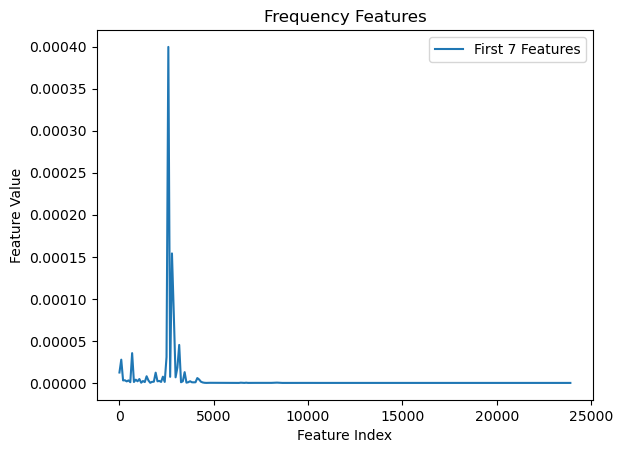

In [15]:
import matplotlib.pyplot as plt

# Plot the first 7 frequency features
plt.plot(freq_features[0, 0, :250, 0].cpu().numpy(), freq_features[0, 0, 250:500, 0].cpu().numpy(),  label='First 7 Features')

plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Frequency Features')
plt.legend()
plt.show()